# Laboratorio 5: Clustering

Integrantes: **José Pablo Canales y Sebastián Salas** Sección 1 ambos.

## Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

Para este lab trabajaremos con un dataset de texto sobre distintas noticias. Luego de procesar el texto, se realizará clustering sobre estos datos.Para este lab trabajaremos con un dataset de texto sobre  noticias de distintos temas (espacio, hockey, y computación gráfica). Luego de procesar el texto, se realizará clustering sobre estos datos.

In [42]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Solo algunas categorías
categories = ['sci.space', 'rec.sport.hockey', 'comp.graphics']

newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

texts = newsgroups.data

# TF-IDF: consideramos la cantidad de veces que aparece c/palabra y que tan
# rara es (teorema de Shannon)
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_vec = vectorizer_tfidf.fit_transform(texts).toarray()
X = pd.DataFrame(X_vec, columns=vectorizer_tfidf.get_feature_names_out())
X

,00,000,0000,00000,000000,000005102000,000062david42,000100255pixel,00041032,0004136,...,zurbrin,zurich,zvi,zwaartepunten,zwak,zwakke,zware,zwarte,zyxel,zzzzzz
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1773,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1774,0.000000,0.125327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Obtuvimos un DataFrame donde cada columna representa una palabra, y su valor representa su importancia en el texto.

Hay una columna por cada posible palabra, por lo que muchos valores son 0 (matriz sparse)

## Visualizar los datos

### Pregunta 1

Nuestra matriz datos es muy dispersa (mayoría de valores en 0). Aplique PCA sobre los datos para reducirlos a solo 100 dimensiones. Visualice las primeras 2 dimensiones de los datos mediante un scatterplot.
Responda brevemente:

1. ¿Cuantos clusters cree que hay?
2. ¿Qué algoritmo de clustering podría funcionar mejor?

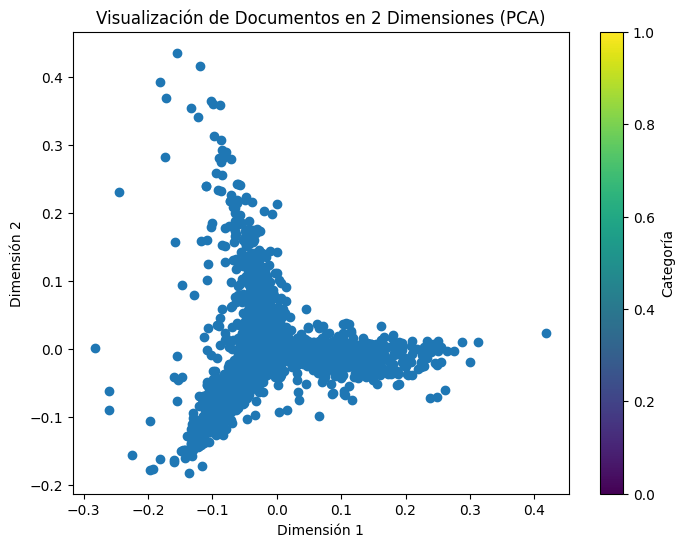

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X) 
x = X_pca[:, 0]
y = X_pca[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.colorbar(label='Categoría')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de Documentos en 2 Dimensiones (PCA)')
plt.show()

>**Respuesta:**
1 - En principio se espera que haya por lo menos 3 clusters.
2 - Dada la forma se espera que k-means haga un mejor trabajo, ya que la densidad es muy alta en todo momento para DBSCAN. 

**Nota**: Desde ahora use `X_pca` a menos que se indique lo contrario

## K-Means

El algoritmo $K$-Means divide los puntos en $K$ (definido por el usuario) grupos disjuntos $\{\mathcal{C}_1, \dots, \mathcal{C}_K\}$ minimizando la varianza intra-cluster. El criterio minimizado $G$ se denomina *inercia*:

$$
G_X(\mathcal{C}_1, \dots, \mathcal{C}_K) = \sum_{k=1}^K \sum_{i \in \mathcal{C}_k}\| \mathbf{x}_i - \mu_k \|^2_2
$$

donde $\mu_k \in \mathbb{R}^d$ son los centroides de las $K$ clases ($|\mathcal{C}_k|$ es el número de puntos en cada clase):

$$
\mu_k = \frac{1}{|\mathcal{C}_k|} \sum_{i \in \mathcal{C}_k} \mathbf{x}_i, \quad \forall k \in [K]
$$

y donde la $i$-ésima observación pertenece a la clase cuyo centroide es más cercano, es decir, $i \in \mathcal{C}_j$ si y solo si:

$$
j = \argmin_{k \in [K]} \| \mathbf{x}_i - \mu_k \|_2 = \argmin_{k \in [K]} \| \mathbf{x}_i - \mu_k \|_2^2
$$

**Nota**: en caso de empates, se resuelven aleatoriamente si es necesario.

El agrupamiento se aprende alternando iterativamente los siguientes dos pasos:

1. Un paso de asignación donde, dados los $(\mu_k)_{k=1,\dots,K}$, determinamos la etiqueta de cada punto.
2. Un paso de actualización de centroides donde, dadas las etiquetas, calculamos los centros de los clusters.

El algoritmo se detiene cuando la inercia deja de disminuir significativamente (nota: incluso sin un criterio de parada, $K$-Means terminará en un número finito de pasos; ver Banerjee et al., 2005).

La inercia es un criterio no convexo, por lo que la solución depende de la inicialización. Por eso, el algoritmo suele ejecutarse múltiples veces con diferentes inicializaciones, y se conserva la solución con la menor inercia.

### Pregunta 2

Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente el método del codo, calculando el sse para el rango de 1 a 10 clusters. ¿Combinando este método y la propia intuición, cuántos clusters propone usar para este dataset? Escoja dos opciones y justifique su elección.

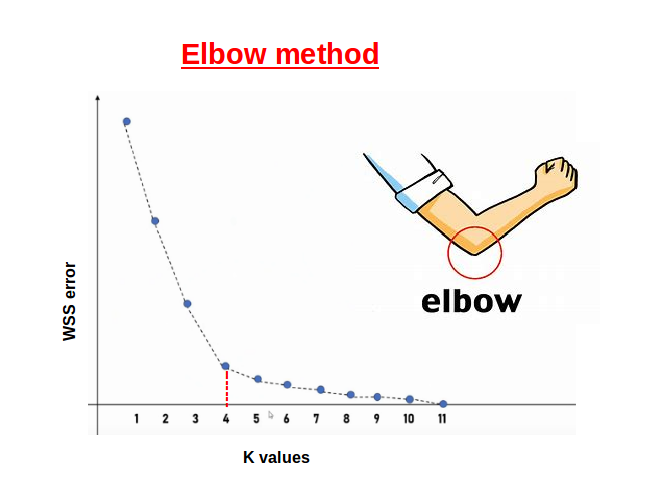

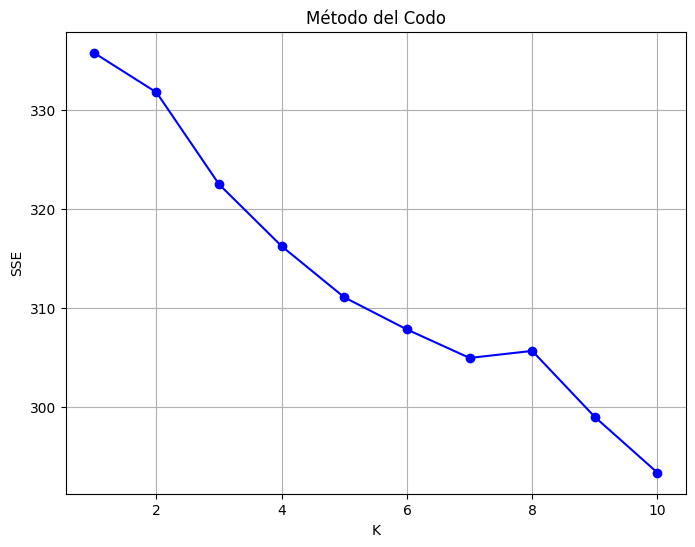

In [44]:
from sklearn.cluster import KMeans

k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', color='b')
plt.title('Método del Codo')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

> **Respuesta:**
Los puntos que contemplan mayor caida desde un punto y otro, que serian el codo, son los puntos para k = 3 y k = 5.

### Pregunta 3

 Entrene KMeans con el valor de $k$ elegido y genere un gráfico con la representación visual de los clusters (usando los datos reducidos).

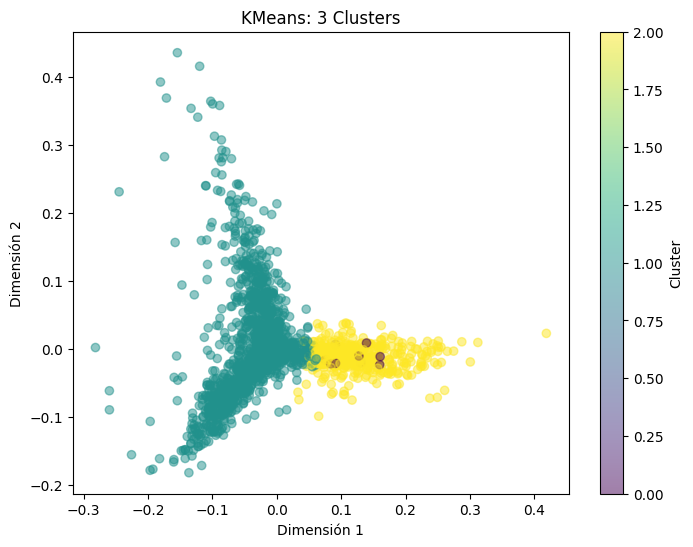

In [45]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5)

plt.colorbar(label='Cluster')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title(f'KMeans: {k} Clusters')
plt.show()

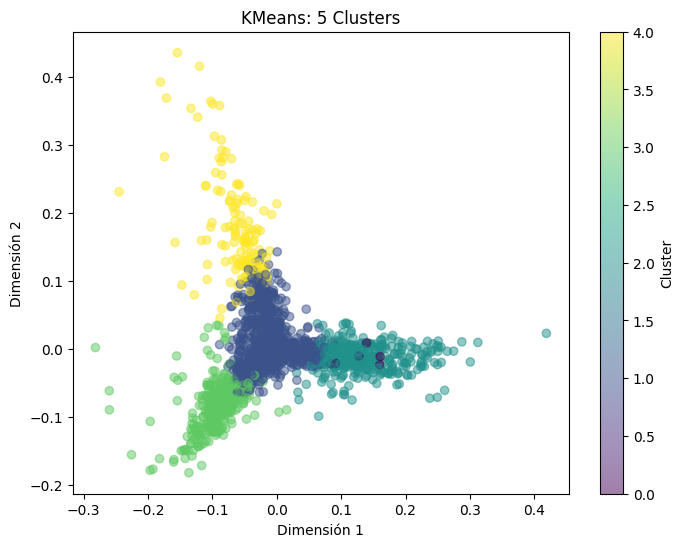

In [46]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
x = X_pca[:, 0]
y = X_pca[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)

plt.colorbar(label='Cluster')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title(f'KMeans: {k} Clusters')
plt.show()

## Clustering Jerárquico

### Pregunta 4

Usando un sample de los datos, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, utilizando la metrica de distancia por defecto y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser gráficos separados (individuales).

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

X_sample = pd.DataFrame(X_pca).sample(50, random_state=0) # utilice solo un sample de los datos

complete = linkage(X_sample, method="complete")    # Vista en clase como MAX
single = linkage(X_sample, method="single")        # Vista en clase como MIN
average = linkage(X_sample, method="average")
ward = linkage(X_sample, method="ward")

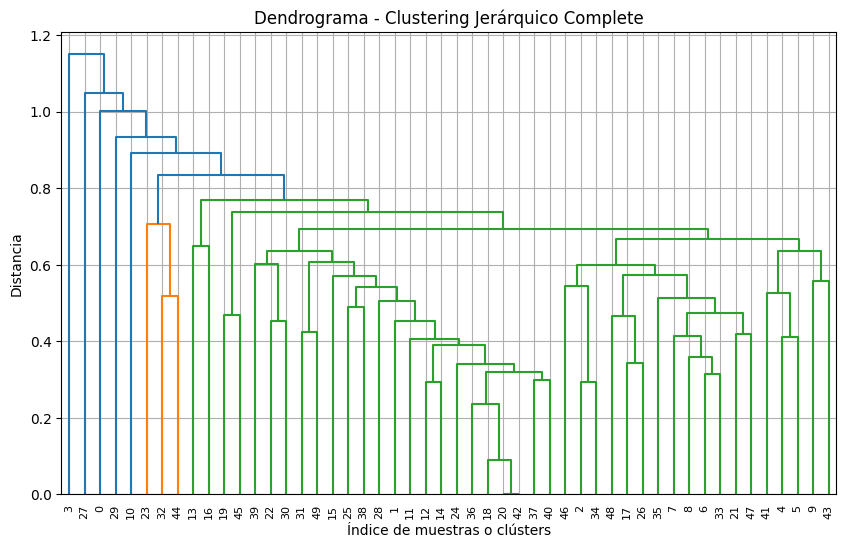

In [48]:
plt.figure(figsize=(10, 6))
dendrogram(complete)
plt.title("Dendrograma - Clustering Jerárquico Complete")
plt.xlabel("Índice de muestras o clústers")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

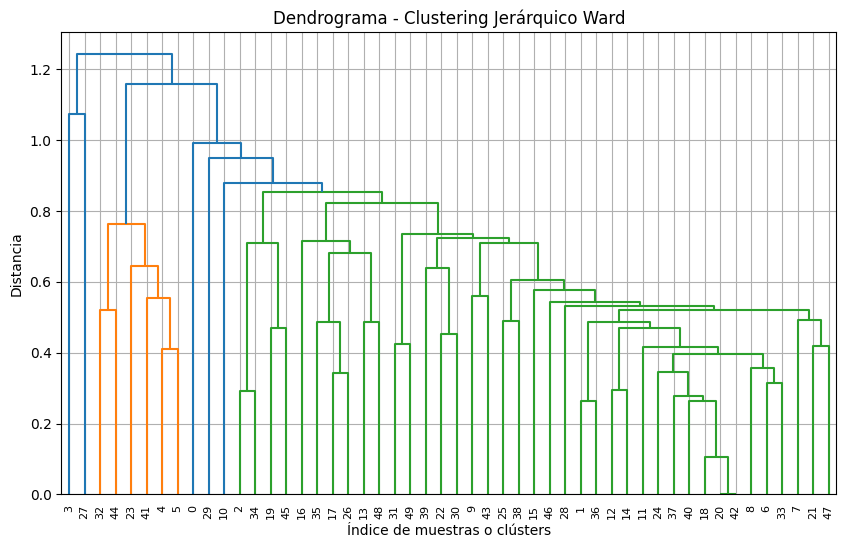

In [49]:
plt.figure(figsize=(10, 6))
dendrogram(ward)
plt.title("Dendrograma - Clustering Jerárquico Ward")
plt.xlabel("Índice de muestras o clústers")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

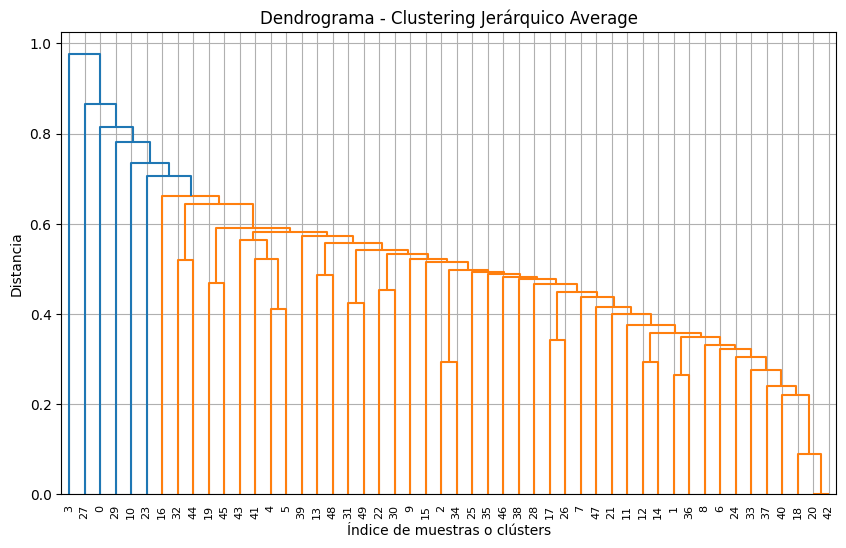

In [50]:
plt.figure(figsize=(10, 6))
dendrogram(average)
plt.title("Dendrograma - Clustering Jerárquico Average")
plt.xlabel("Índice de muestras o clústers")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

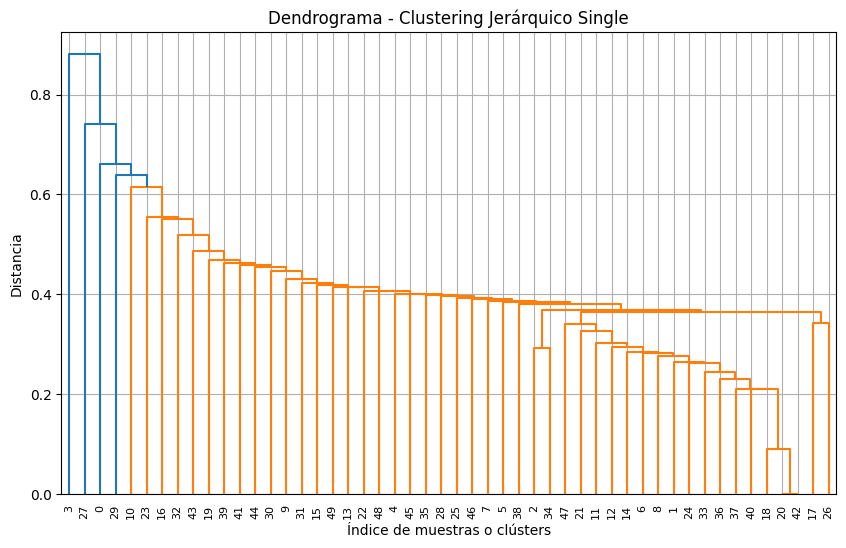

In [51]:
plt.figure(figsize=(10, 6))
dendrogram(single)
plt.title("Dendrograma - Clustering Jerárquico Single")
plt.xlabel("Índice de muestras o clústers")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

### Pregunta 5

Vuelva a ejecutar el dendograma para el método `ward`, pero con el conjunto X completo. ¿"Visualmente" cuántos clusters propone usar? ¿A qué altura recomendaría cortar el árbol?

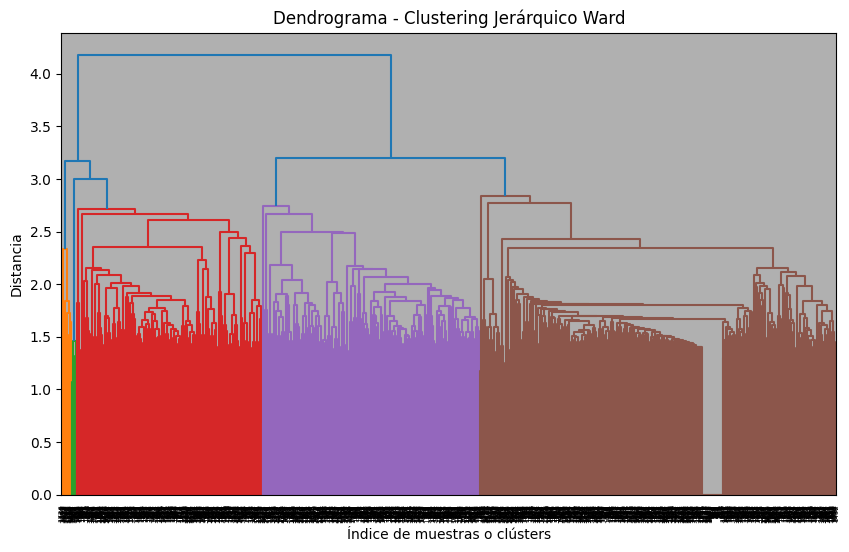

In [52]:
ward_comp = linkage(X, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(ward_comp)
plt.title("Dendrograma - Clustering Jerárquico Ward")
plt.xlabel("Índice de muestras o clústers")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

> **Respuesta:**
Identificamos 5 clusters y con respecto a la altura de corte, se debe realizar un corte en 3.0, esto dado que a partir de este punto las divisiones se vuelven cada vez más frecuentes y ya no aportarían a identificar grupos generales para los clusters.

### Pregunta 6

 Implemente el código para asignar clusters a los datos siguiendo lo que usted la áltura de corte que propuso en la pregunta anterior. Señale cuántos clusters se generan. Luego, usando el dataset con dimensiones reducidas generado con PCA, grafique los datos y píntelos con su asignacion de clusters.

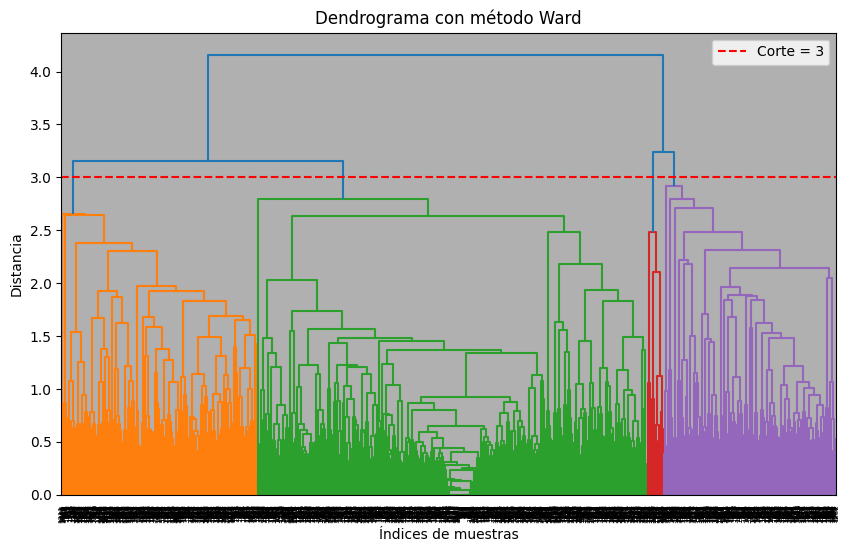

In [53]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

ward_pca = linkage(X_pca, method="ward")


corte = 3
ward_labels = fcluster(ward_pca, t=corte, criterion='distance')

plt.figure(figsize=(10, 6))
dendrogram(ward_pca, color_threshold=corte)
plt.axhline(y=corte, color='red', linestyle='--', label=f'Corte = {corte}')
plt.title("Dendrograma con método Ward")
plt.xlabel("Índices de muestras")
plt.ylabel("Distancia")
plt.legend()
plt.grid(True)
plt.show()

## DBSCAN

Ahora probaremos hacer el clustering con el método DBSCAN.


### Pregunta 7

Explique el funcionamiento general del método de DBSCAN e indique que rol juegan los parámetros min_samples y eps.

>**Respuesta:**  funciona agrupando puntos que están cerca unos de otros, definidos por un radio (eps) y un número mínimo de puntos (min_samples). Los puntos dentro de este radio que tienen suficientes vecinos forman un cluster, mientras que los que no cumplen esta condición se consideran ruido.

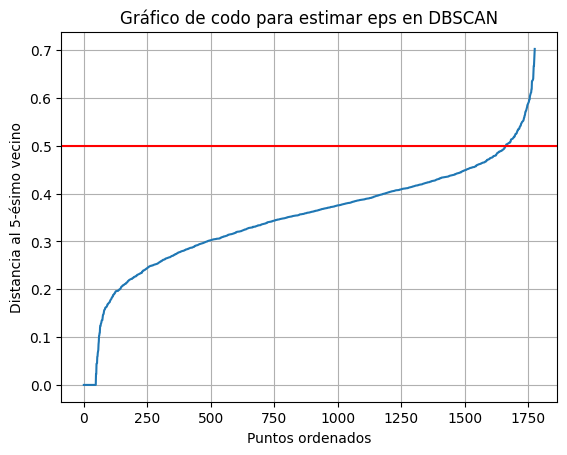

In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  # usado como min_samples en DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_pca)
distances, _ = neighbors_fit.kneighbors(X_pca)
k_distances = np.sort(distances[:, k-1]) # Ordenar las distancias al k-ésimo vecino

plt.plot(k_distances)

plt.axhline(y=0.5, color='r')
plt.ylabel(f'Distancia al {k}-ésimo vecino')
plt.xlabel('Puntos ordenados')
plt.title('Gráfico de codo para estimar eps en DBSCAN')
plt.grid(True)
plt.show()

Ejecute la siguiente celda que implementa el método de DBSCAN:

3 clusters


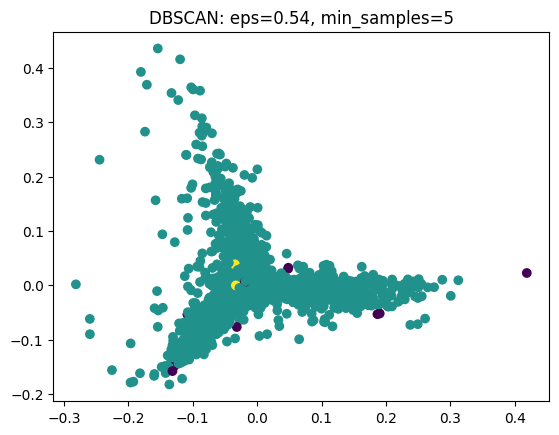

In [55]:
from sklearn.cluster import DBSCAN

#Pauta
eps = 0.54
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)

print(len(np.unique(dbscan.labels_) - 1), "clusters")

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

¿Es una buena idea usar DBSCAN en este caso? Justifique

>**Respuesta:** No es el modelo adecuado, como DBSCAN se basa en densidades locales, si hay regiones densas y otras más dispersas, el modelo da a entender que sólo existe un único cluster general, lo cual no aporta información.

## Evaluación

### Pregunta 8

Complete la función que dado los labels de los clusters, imprima las 15 palabras más importantes de cada uno.

In [56]:
def palabras_caracteristicas(X, labels):
  df = X.copy()

  df['cluster_label'] = labels

  for id in np.unique(labels):
    cluster_df =df[df['cluster_label'] == id]
    cluster_df = cluster_df.drop('cluster_label', axis=1)

    cluster_df = cluster_df.sum(axis = 0).sort_values(ascending=False).head(15)
    
    print(f'\n cluster {id}')
    print(", ".join(cluster_df.index))

In [57]:
print("KMeans:")
palabras_caracteristicas(X, kmeans.labels_)
print("\nWard:")
palabras_caracteristicas(X, ward_labels)
print("\nDBSCAN:")
palabras_caracteristicas(X, dbscan.labels_)

KMeans:

 cluster 0
gm, murray, sharks, adirondack, coach, utica, rochester, baltimore, cdi, binghamton, team, trades, providence, springfield, moncton

 cluster 1
just, like, don, think, know, edu, does, time, people, space, good, ve, sure, use, need

 cluster 2
game, team, hockey, games, play, players, season, nhl, year, league, win, think, detroit, don, leafs

 cluster 3
thanks, graphics, files, file, know, image, windows, program, format, does, need, help, advance, looking, hi

 cluster 4
space, nasa, moon, lunar, orbit, launch, shuttle, earth, station, gov, data, program, cost, sci, mission

Ward:

 cluster 1
graphics, thanks, files, image, software, file, program, know, need, windows, help, format, use, hi, does

 cluster 2
space, like, just, nasa, don, know, think, moon, orbit, does, time, launch, earth, people, edu

 cluster 3
pts, 10, period, 11, vs, pp, 12, 55, cal, chi, pit, scorer, bos, det, 25

 cluster 4
game, team, hockey, players, play, games, season, nhl, year, league,

### Pregunta 9

El coeficiente de Silhouette cuantifica la cohesión y separación de un punto al calcular el cociente entre la distancia promedio a los puntos del mismo cluster y la distancia promedio al otro clusters más cercano

Para cada uno de los experimentos (los dos de la parte de `KMeans`, el con el método `Ward` en la parte de clustering jerárquico y el con `DBSCAN`), adjunte el código que permita obtener el Silhouette score de los modelos.

In [58]:
from sklearn.metrics import silhouette_score

# Escriba su código aquí

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_pca)

silhouette_kmeans_3 = silhouette_score(X, kmeans.labels_)

k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_pca)

silhouette_kmeans_5 = silhouette_score(X, kmeans.labels_)


silhouette_ward = silhouette_score(X, ward_labels)

silhouette_dbscan = silhouette_score(X, dbscan.labels_)

print(f'kmeans, k = 3: {silhouette_kmeans_3}')
print(f'kmeans, k = 5: {silhouette_kmeans_5}')
print(f'ward: {silhouette_ward}')
print(f'dbscan: {silhouette_dbscan}')


kmeans, k = 3: 0.010569415179570142
kmeans, k = 5: 0.007199628478432038
ward: 0.006361374415729296
dbscan: 0.008007064687175906


En base a las palabras importantes de los clusters definidos por los modelos, y sus coeficientes de Sihlouette, ¿cuál cree que es el que da mejores clusters? Comente al respecto basándose principalmente en los resultados.

> **Respuesta:** El mejor modelo corresponde a kmeans con k=3, las palabras comparten similitud por ejemplo space y nasa en el cluster 4, además que su coeficiente de silhouette es el mayor de todos, aunque en general es bastante bajo. 

## (BONUS) ¿Cómo podemos mejorar los resultados?

Hasta ahora solo hemos trabajado con la aparición de las palabras en los textos, pero no hemos incorporado representaciones de la semántica de las palabras. Para esto, usaremos representaciones de un Modelo de Lenguaje, a través de la librería [BERTopic](https://maartengr.github.io/BERTopic/index.html)

Use la librería para generar un cluster basado en K-Means con 3 clusters, y vizualizar el resultado

In [59]:
# !pip install bertopic

In [60]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
## Eliminar términos frecuentes como conectores, preposiciones, ...
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\W+", " ", text)  # eliminar puntuación
    text = re.sub(r"\d+", " ", text)  # eliminar números
    words = text.split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

cleaned_news = [clean_text(doc) for doc in texts[0:300]]

In [61]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Cargar modelo para obtener representaciones
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# TODO: obtener representaciones

# TODO: Cargar bertopic con KMeans como algorimto de clustering


ModuleNotFoundError: No module named 'bertopic'

In [ ]:
# Visualizar cluster de documentos

## Aplicación a la Compresión de Imágenes

Los algoritmos de clustering también pueden utilizarse para cuantización vectorial. En una imagen a color, cada píxel se codifica con 3 valores (rojo, verde y azul - RGB), cada uno codificado como un byte (entero entre 0 y 255).

La idea de la cuantización vectorial es codificar cada píxel usando solo $K$ colores, donde $K$ es mucho menor que los $256^3$ valores posibles. Así, la imagen puede almacenarse de forma más compacta.

### Preguntas

9. Aplica el algoritmo $K$-Medias para reducir el número de niveles de color en una imagen a $K=32$ valores. Muestra el resultado como una imagen. ¿A partir de qué valor de $K$ dejamos de ver diferencia con la imagen original?

Para usar tus estimadores, necesitarás redimensionar (reshape) la imagen para trabajar con un array bidimensional de tamaño número de píxeles por tres, ya que hay tres colores en la codificación RGB.



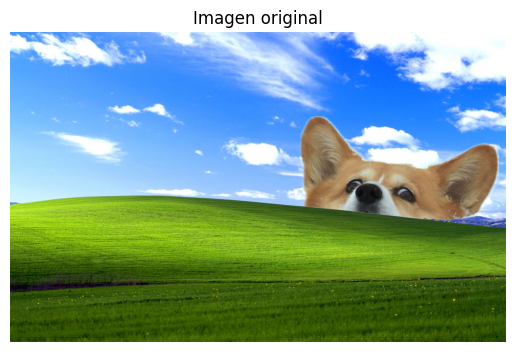

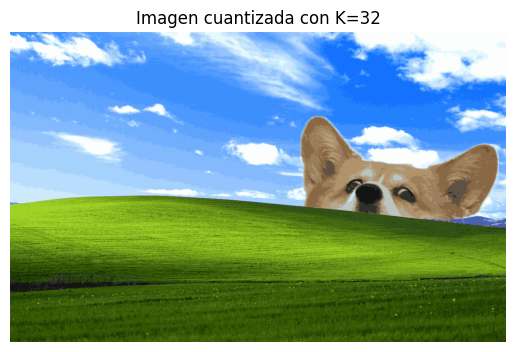

In [79]:
img = plt.imread('image.jpg')
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')
plt.show()

imagen_reshaped = img.reshape(-1, 3)

n_clusters = 32
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(imagen_reshaped)

centers = kmeans.cluster_centers_.astype(np.uint8)
labels = kmeans.labels_
imagen = centers[labels].reshape(img.shape)

plt.imshow(imagen)
plt.title(f"Imagen cuantizada con K={n_clusters}")
plt.axis('off')
plt.show()

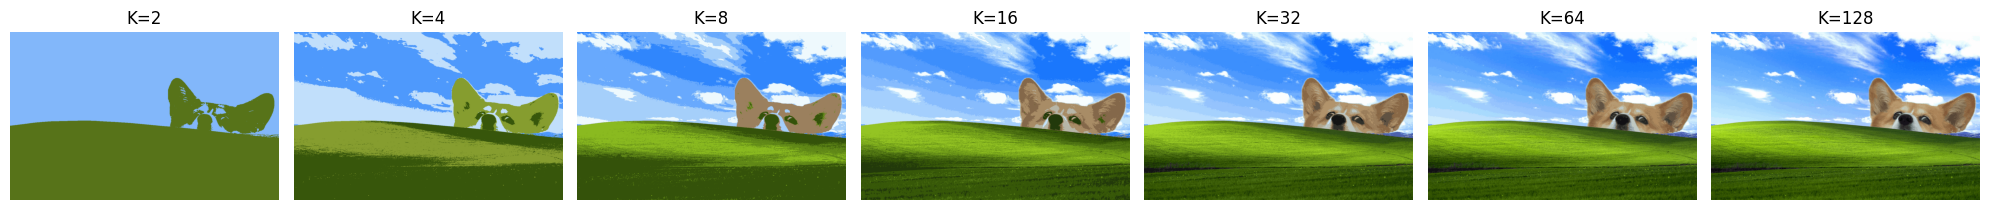

In [80]:
ks = [2, 4, 8, 16, 32, 64, 128]
fig, axes = plt.subplots(1, len(ks), figsize=(20, 5))

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)
    centroids = kmeans.cluster_centers_.astype(np.uint8)
    labels = kmeans.labels_
    img_k = centroids[labels].reshape(img.shape)
    axes[i].imshow(img_k)
    axes[i].set_title(f'K={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

> **Respuesta:** Notamos que para k = 16 se comienza a notar la diferencia con la imagen original.